In [1]:
import numpy as np
import random
from IPython.display import Image

Simple maze environment

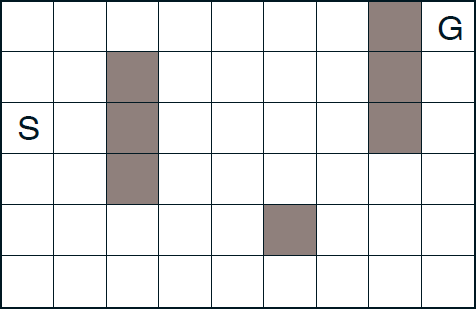

In [2]:
Image("maze.png")

In [3]:
Q_table = np.zeros((6,9,4))
N_table = np.zeros((6,9,4))

In [4]:
def environment(S,A):
    if S == (1,8) and A == 0:
        return 1, (-1,-1)
    
    if A == 0:
        if S[0]==0 or S==(4,2) or S==(5,5) or S==(3,7):
            return 0, S
        else:
            return 0, (S[0]-1,S[1])
    elif A == 1:
        if S[1]==8 or S==(1,1) or S==(2,1) or S==(3,1) or S==(0,6) or S==(1,6) or S==(2,6) or S==(4,4):
            return 0, S
        else:
            return 0, (S[0],S[1]+1)
    elif A == 2:
        if S[0]==5 or S==(0,2) or S==(3,5):
            return 0, S
        else:
            return 0, (S[0]+1,S[1])
    elif A == 3:
        if S[1]==0 or S==(1,3) or S==(2,3) or S==(3,3) or S==(4,6) or S==(1,8) or S==(2,8):
            return 0, S
        else:
            return 0, (S[0],S[1]-1)
        
def episode_sampling(k):
    state_list = []
    reward_list = []
    action_list = []
    cur_state = (2,0)
    while cur_state != (-1,-1):
        state_list.append(cur_state)
        action = GLIE_epsilon_greedy_policy(cur_state, k)
        reward, cur_state = environment(cur_state, action)
        reward_list.append(reward)
        action_list.append(action)
    return state_list, reward_list, action_list

def get_return(reward_list):
    return_list = []
    length = len(reward_list)
    for i in range(length):
        G = 0.0
        gamma = 1.0
        for j in range(i,length):
            G += reward_list[j] * gamma
            gamma *= 0.95
        return_list.append(G)
    return return_list

def MC_evaluation(state_list, return_list, action_list):
    for s, a, G in zip(state_list, action_list, return_list):
        N_table[s+(a,)] += 1
        Q_table[s+(a,)] += (1/N_table[s+(a,)])*(G - Q_table[s+(a,)])
        
def GLIE_epsilon_greedy_policy(state, k):
    if k < 1000: epsilon = 0.9**k
    else: epsilon = 0.1
    greedy_action = np.argmax(Q_table[state])
    a = [0,1,2,3]
    a.remove(greedy_action)
    a = [greedy_action] + a
    action = np.random.choice(a, p=[epsilon/4 + 1 - epsilon, epsilon/4, epsilon/4, epsilon/4])
    return action

def greedy_policy(state):
    return np.argmax(Q_table[state])

def train_agent(num_episode = 1000):
    for k in range(1,num_episode+1):
        state_list, reward_list, action_list = episode_sampling(k)
        return_list = get_return(reward_list)
        MC_evaluation(state_list, return_list, action_list)
        if k%500 == 0: print('Episode : %d'%k,'Step_count : %d'%len(state_list))

def test_agent():
    cur_state = (2,0)
    count = 0
    while cur_state != (-1,-1):
        action = greedy_policy(cur_state)
        count += 1
        if action == 0: action_str = 'up'
        elif action == 1: action_str = 'right'
        elif action == 2: action_str = 'down'
        else: action_str = 'left'
        print('State : '+str(cur_state)+' Action : '+action_str)
        _, cur_state = environment(cur_state, action)
    print('Step_count : %d'%count)

In [5]:
train_agent(20000)

Episode : 500 Step_count : 14
Episode : 1000 Step_count : 16
Episode : 1500 Step_count : 16
Episode : 2000 Step_count : 16
Episode : 2500 Step_count : 14
Episode : 3000 Step_count : 14
Episode : 3500 Step_count : 16
Episode : 4000 Step_count : 15
Episode : 4500 Step_count : 16
Episode : 5000 Step_count : 14
Episode : 5500 Step_count : 15
Episode : 6000 Step_count : 14
Episode : 6500 Step_count : 16
Episode : 7000 Step_count : 15
Episode : 7500 Step_count : 14
Episode : 8000 Step_count : 18
Episode : 8500 Step_count : 14
Episode : 9000 Step_count : 18
Episode : 9500 Step_count : 14
Episode : 10000 Step_count : 18
Episode : 10500 Step_count : 18
Episode : 11000 Step_count : 16
Episode : 11500 Step_count : 16
Episode : 12000 Step_count : 18
Episode : 12500 Step_count : 14
Episode : 13000 Step_count : 14
Episode : 13500 Step_count : 14
Episode : 14000 Step_count : 14
Episode : 14500 Step_count : 14
Episode : 15000 Step_count : 14
Episode : 15500 Step_count : 19
Episode : 16000 Step_count :

In [6]:
test_agent()

State : (2, 0) Action : down
State : (3, 0) Action : right
State : (3, 1) Action : down
State : (4, 1) Action : right
State : (4, 2) Action : right
State : (4, 3) Action : up
State : (3, 3) Action : right
State : (3, 4) Action : right
State : (3, 5) Action : right
State : (3, 6) Action : right
State : (3, 7) Action : right
State : (3, 8) Action : up
State : (2, 8) Action : up
State : (1, 8) Action : up
Step_count : 14
